# student ids:

160363,

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Data/greenhouse-gas-emissions.xlsx"
variables = pd.read_excel(file_path, sheet_name=1)   # variable descriptions
df = pd.read_excel(file_path, sheet_name=2)           # emission data

## Question 1
### Exploratory Data Analysis (EDA)
The provided dataset contains UK territorial greenhouse gas emissions by source and activity, cover-
ing the period from 1990 onwards. Emissions are attributed to the sector that emits them directly
and include indicators related to UK territorial totals, international aviation and shipping, and Paris
Agreement coverage.
Perform Exploratory Data Analysis (EDA) to investigate the key factors driving changes in UK
greenhouse gas emissions over time.
1. Write a Python program to perform a covariance- and correlation-based analysis to examine
relationships between emissions, sources, and activities across years. Do not use any built-in
covariance or correlation functions. You must implement your calculations.
2. Write another Python program to visualise your findings from the previous step and briefly
explain the observed emission patterns. Hints: You may consider using histograms, boxplots,
and scatterplots.

In [25]:
# --- Initial EDA ---
print("Shape:", df.shape)
print("Year range:", df["Year"].min(), "to", df["Year"].max())
print("Unique years:", df["Year"].nunique())
print()

# Column types
df.info()

Shape: (78022, 15)
Year range: 1990 to 2024
Unique years: 35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78022 entries, 0 to 78021
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Included in UK territorial total            78022 non-null  object 
 1   GHG                                         78022 non-null  object 
 2   GHG grouped                                 78022 non-null  object 
 3   CRT category                                78022 non-null  object 
 4   CRT category description                    78022 non-null  object 
 5   Year                                        78022 non-null  int64  
 6   Territory name                              78022 non-null  object 
 7   Territorial Emissions Statistics sector     78022 non-null  object 
 8   Territorial Emissions Statistics subsector  78022 non-null  object 
 9   Territorial Emissions

In [26]:
# Missing values
print("Missing values per column:")
print(df.isna().sum())
print()

# Summary stats for numeric columns
df.describe()

Missing values per column:
Included in UK territorial total              0
GHG                                           0
GHG grouped                                   0
CRT category                                  0
CRT category description                      0
Year                                          0
Territory name                                0
Territorial Emissions Statistics sector       0
Territorial Emissions Statistics subsector    0
Territorial Emissions Statistics category     0
Source                                        0
Fuel group                                    0
Fuel                                          0
Activity                                      0
Emissions (MtCO2e)                            0
dtype: int64



,Year,Emissions (MtCO2e)
count,78022.000000,78022.000000
mean,2007.771295,0.293069
std,9.982078,3.036902
min,1990.000000,-18.002028
25%,1999.000000,0.000124
50%,2008.000000,0.002087
75%,2016.000000,0.026358
max,2024.000000,184.014756


In [27]:
# Categorical column overview
cat_cols = [
    "Territorial Emissions Statistics sector",
    "Territorial Emissions Statistics subsector",
    "Source",
    "Fuel group",
    "Activity",
    "GHG grouped"
]

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Territorial Emissions Statistics sector: 9 unique values
Territorial Emissions Statistics subsector: 28 unique values
Source: 700 unique values
Fuel group: 5 unique values
Activity: 221 unique values
GHG grouped: 7 unique values


In [28]:
# Emission distribution
print("Emissions (MtCO2e) summary:")
print(f"  Min:    {df['Emissions (MtCO2e)'].min():.4f}")
print(f"  Max:    {df['Emissions (MtCO2e)'].max():.4f}")
print(f"  Mean:   {df['Emissions (MtCO2e)'].mean():.4f}")
print(f"  Median: {df['Emissions (MtCO2e)'].median():.6f}")
print()

# Note negative values (carbon sinks like LULUCF)
neg = df[df["Emissions (MtCO2e)"] < 0]
print(f"Rows with negative emissions: {len(neg)} ({len(neg)/len(df)*100:.1f}%)")
print(f"These come from sectors: {neg['Territorial Emissions Statistics sector'].unique().tolist()}")

Emissions (MtCO2e) summary:
  Min:    -18.0020
  Max:    184.0148
  Mean:   0.2931
  Median: 0.002087

Rows with negative emissions: 3310 (4.2%)
These come from sectors: ['LULUCF']


In [3]:
# Remove non-UK territorial emissions
territorial = df[df["Included in UK territorial total"].str.lower() == "yes"].copy()

In [4]:
# aggregate by year and sectors
SECTOR_COL = "Territorial Emissions Statistics sector"

sector_year = (
    territorial
    .groupby(["Year", SECTOR_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

In [5]:
# pivot to wide format (rows - years, columns - sectors)

pivot = (
    sector_year
    .pivot(index="Year", columns=SECTOR_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

print("Shape:", pivot.shape)
pivot.head()

Shape: (35, 8)


Territorial Emissions Statistics sector,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Year,,,,,,,,
1990,54.988754,109.492561,124.191169,203.990902,77.192227,155.662400,10.266883,55.039201
1991,54.800121,121.292199,122.552535,200.562839,78.080868,156.665141,9.772005,56.836696
1992,54.457877,117.743777,123.850246,188.466186,79.240850,149.650442,8.962862,58.000423
1993,53.561508,121.671071,124.995984,170.963203,78.927561,143.356940,8.401128,59.475666
1994,54.320493,116.627834,125.175291,166.731982,71.448923,145.437790,7.925957,60.982346


In [7]:
def mean(xs):
    xs = list(xs)
    return sum(xs) / len(xs)

def covariance(xs, ys, ddof=1):
    xs, ys = list(xs), list(ys)
    n = len(xs)
    mx, my = mean(xs), mean(ys)
    return sum((x - mx) * (y - my) for x, y in zip(xs, ys)) / (n - ddof)

def std(xs, ddof=1):
    xs = list(xs)
    n = len(xs)
    m = mean(xs)
    return math.sqrt(sum((x - m) ** 2 for x in xs) / (n - ddof))

def correlation(xs, ys):
    sx, sy = std(xs), std(ys)
    if sx == 0 or sy == 0:
        return float("nan")
    return covariance(xs, ys) / (sx * sy)

In [8]:
# --- Step 5: Build covariance and correlation matrices ---

sectors = pivot.columns.tolist()

cov_matrix = pd.DataFrame(index=sectors, columns=sectors, dtype=float)
corr_matrix = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        cov_matrix.loc[s1, s2] = covariance(pivot[s1].values, pivot[s2].values)
        corr_matrix.loc[s1, s2] = correlation(pivot[s1].values, pivot[s2].values)

print("Covariance matrix:")
display(cov_matrix.round(2))

print("\nCorrelation matrix:")
display(corr_matrix.round(3))

Covariance matrix:


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,7.29,28.16,11.57,99.48,41.04,89.26,8.15,38.83
Buildings and product uses,28.16,173.11,67.56,575.03,181.78,373.71,31.81,193.37
Domestic transport,11.57,67.56,58.91,268.73,65.55,132.82,8.32,78.62
Electricity supply,99.48,575.03,268.73,2564.24,677.64,1408.67,118.14,677.31
Fuel supply,41.04,181.78,65.55,677.64,268.90,567.09,54.18,256.58
Industry,89.26,373.71,132.82,1408.67,567.09,1231.17,117.08,538.61
LULUCF,8.15,31.81,8.32,118.14,54.18,117.08,12.10,49.70
Waste,38.83,193.37,78.62,677.31,256.58,538.61,49.70,277.05



Correlation matrix:


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,1.000,0.793,0.558,0.728,0.927,0.942,0.867,0.864
Buildings and product uses,0.793,1.000,0.669,0.863,0.843,0.810,0.695,0.883
Domestic transport,0.558,0.669,1.000,0.691,0.521,0.493,0.312,0.615
Electricity supply,0.728,0.863,0.691,1.000,0.816,0.793,0.671,0.804
Fuel supply,0.927,0.843,0.521,0.816,1.000,0.986,0.950,0.940
Industry,0.942,0.810,0.493,0.793,0.986,1.000,0.959,0.922
LULUCF,0.867,0.695,0.312,0.671,0.950,0.959,1.000,0.858
Waste,0.864,0.883,0.615,0.804,0.940,0.922,0.858,1.000


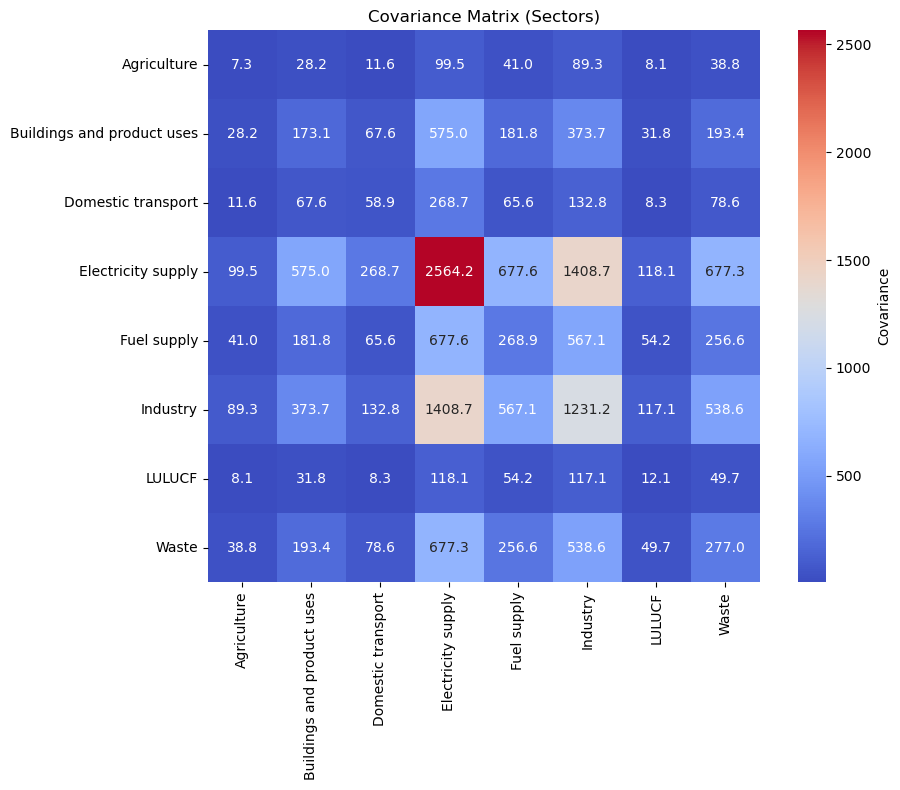

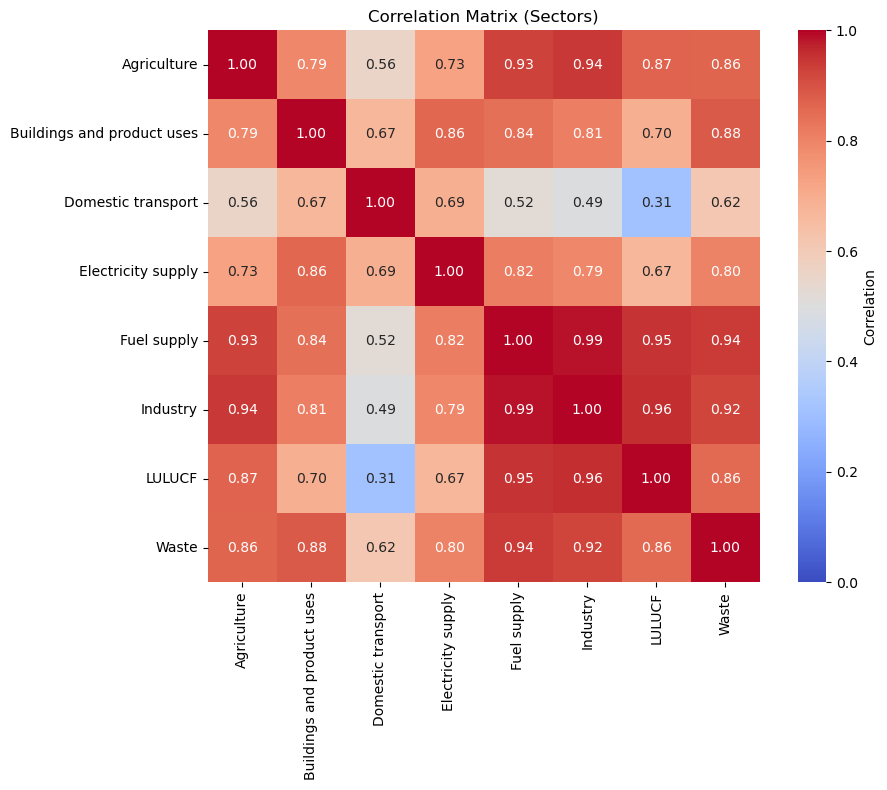

In [23]:
# --- Covariance matrix heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cov_matrix.astype(float),
    ax=ax,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    square=True,
    cbar_kws={"label": "Covariance"}
)
ax.set_title("Covariance Matrix (Sectors)")
plt.tight_layout()
plt.show()

# --- Correlation matrix heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Sectors)")
plt.tight_layout()
plt.show()

In [ ]:
# --- Step 6: Year-over-year differenced correlation ---
# Strips out shared downward trend to show actual short-term co-movement

diff = pivot.diff().dropna()

diff_corr = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        diff_corr.loc[s1, s2] = correlation(diff[s1].values, diff[s2].values)

print("Correlation matrix (year-over-year changes):")
display(diff_corr.round(3))

Correlation matrix (year-over-year changes):


,Agriculture,Buildings and product uses,Domestic transport,Electricity supply,Fuel supply,Industry,LULUCF,Waste
Agriculture,1.000,0.261,0.251,-0.101,-0.069,0.238,-0.185,-0.014
Buildings and product uses,0.261,1.000,0.033,0.389,0.044,0.205,-0.017,-0.049
Domestic transport,0.251,0.033,1.000,0.114,0.069,0.125,-0.094,0.180
Electricity supply,-0.101,0.389,0.114,1.000,-0.178,0.317,-0.098,-0.117
Fuel supply,-0.069,0.044,0.069,-0.178,1.000,-0.001,-0.049,0.244
Industry,0.238,0.205,0.125,0.317,-0.001,1.000,-0.043,0.055
LULUCF,-0.185,-0.017,-0.094,-0.098,-0.049,-0.043,1.000,-0.051
Waste,-0.014,-0.049,0.180,-0.117,0.244,0.055,-0.051,1.000


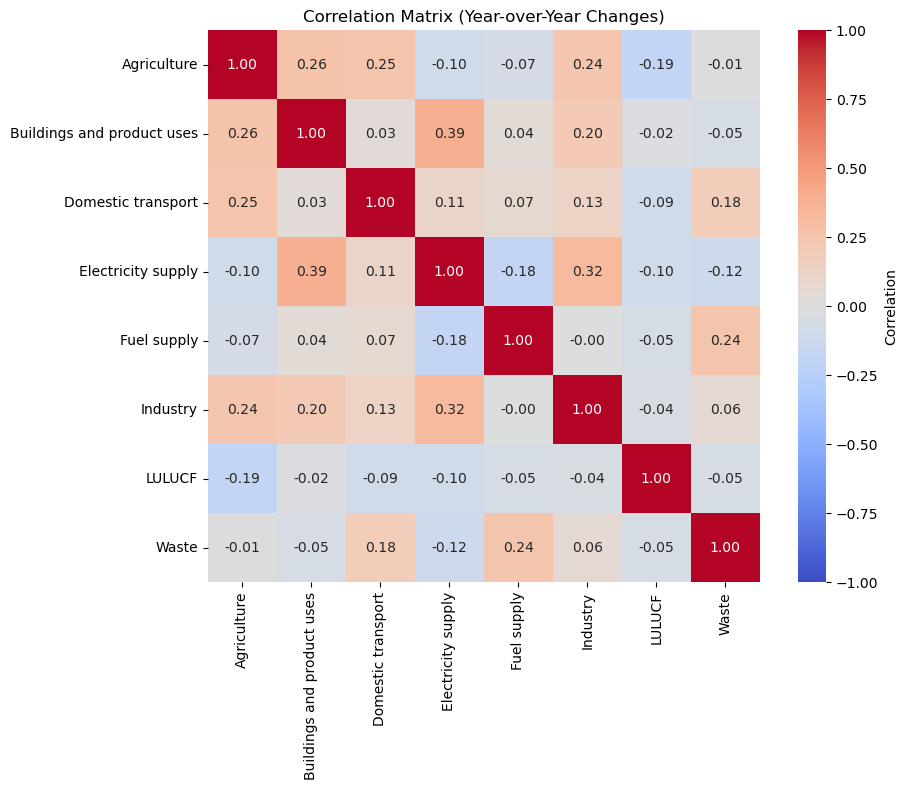

In [10]:
# --- Differenced correlation heatmap ---
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    diff_corr.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Year-over-Year Changes)")
plt.tight_layout()
plt.show()

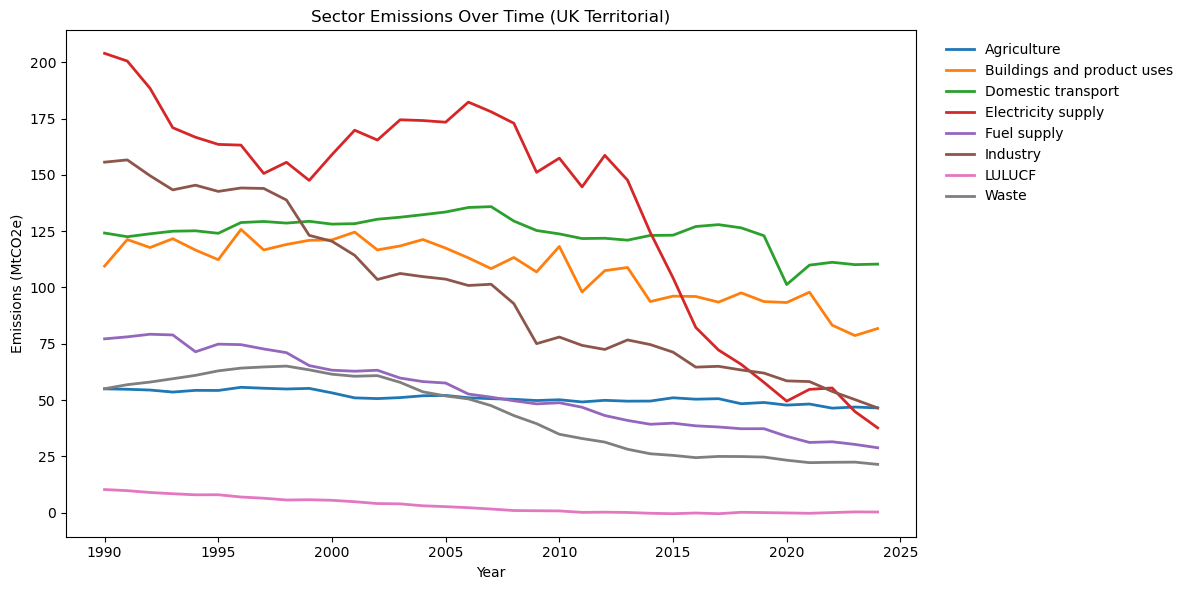

In [13]:
# --- Sector emission trajectories over time ---
fig, ax = plt.subplots(figsize=(12, 6))
for sector in pivot.columns:
    ax.plot(pivot.index, pivot[sector], linewidth=2, label=sector)
ax.set_title("Sector Emissions Over Time (UK Territorial)")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

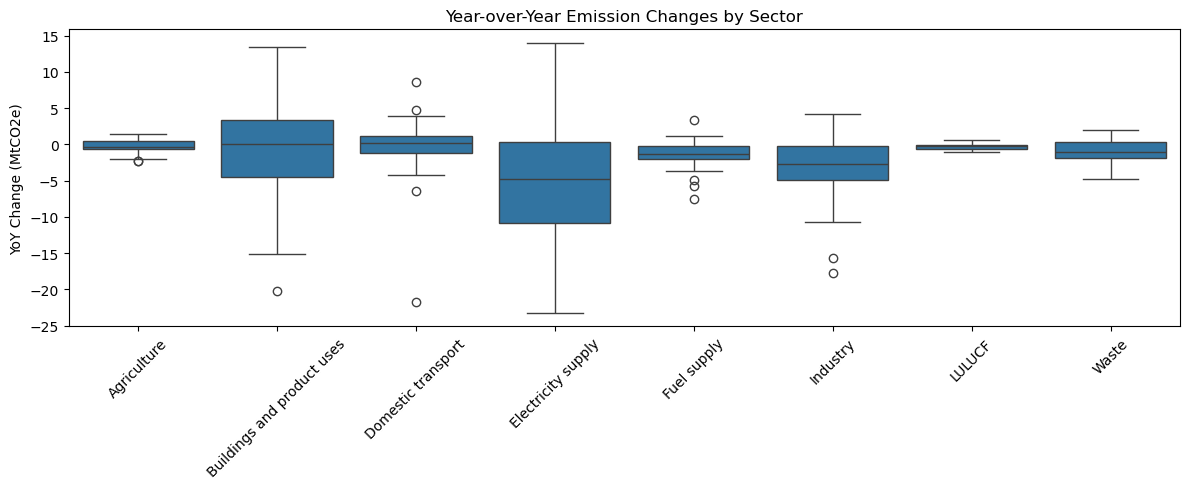

In [24]:
# --- Boxplot of year-over-year changes by sector ---
yoy = pivot.diff().dropna()
yoy_long = yoy.reset_index().melt(id_vars="Year", var_name="Sector", value_name="YoY Change")

fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=yoy_long, x="Sector", y="YoY Change", ax=ax)
ax.set_title("Year-over-Year Emission Changes by Sector")
ax.set_ylabel("YoY Change (MtCO2e)")
ax.set_xlabel("")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

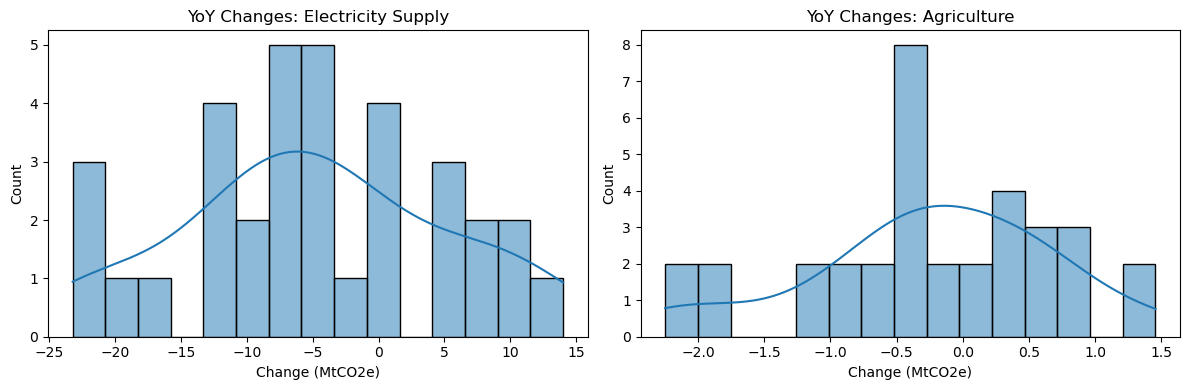

In [16]:
# --- Histograms for contrasting sectors ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(yoy["Electricity supply"], bins=15, kde=True, ax=axes[0], alpha=0.5)
axes[0].set_title("YoY Changes: Electricity Supply")
axes[0].set_xlabel("Change (MtCO2e)")

sns.histplot(yoy["Agriculture"], bins=15, kde=True, ax=axes[1], alpha=0.5)
axes[1].set_title("YoY Changes: Agriculture")
axes[1].set_xlabel("Change (MtCO2e)")

plt.tight_layout()
plt.show()

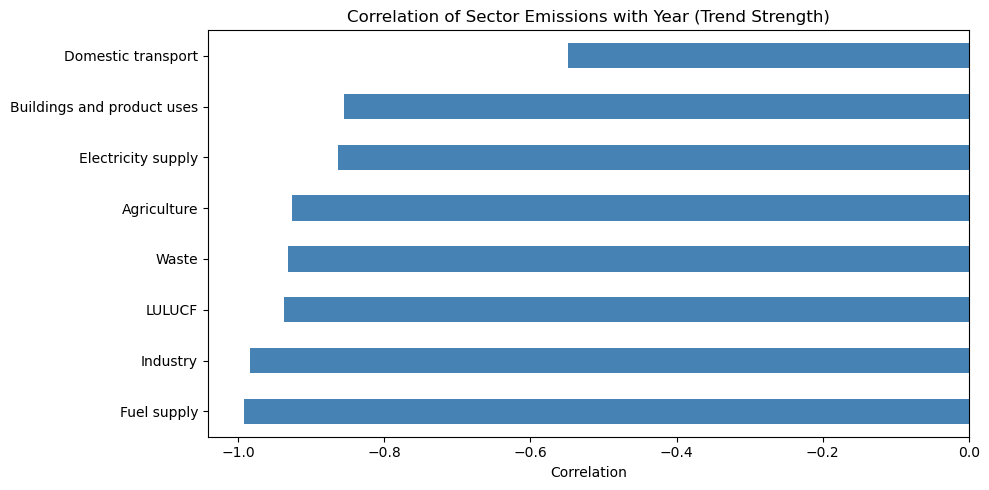

In [20]:
# --- Correlation with Year (trend strength) ---
years = pivot.index.values
corr_with_year = pd.Series({
    s: correlation(years, pivot[s].values) for s in sectors
}).sort_values()

fig, ax = plt.subplots(figsize=(10, 5))
corr_with_year.plot(kind="barh", ax=ax, color="steelblue")
ax.set_title("Correlation of Sector Emissions with Year (Trend Strength)")
ax.set_xlabel("Correlation")
ax.axvline(x=0, color="black", linewidth=0.5)
plt.tight_layout()
plt.show()

In [29]:
# --- Fuel group aggregation and pivot ---
FUEL_COL = "Fuel group"

fuel_year = (
    territorial
    .groupby(["Year", FUEL_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

pivot_fuel = (
    fuel_year
    .pivot(index="Year", columns=FUEL_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

print("Shape:", pivot_fuel.shape)
pivot_fuel.head()

Shape: (35, 5)


Fuel group,Coal,Gaseous fuels,Other emissions,Other solid fuels,Petroleum
Year,,,,,
1990,221.201645,148.464106,209.842656,14.814075,196.501615
1991,223.790559,156.244617,209.894152,14.290065,196.343011
1992,209.220581,155.377805,205.279474,14.959005,195.535798
1993,179.702582,170.932214,200.649420,15.055283,195.013564
1994,167.372512,179.496265,197.686335,13.784836,190.310669


In [32]:
# --- Fuel group covariance and correlation matrices ---
fuels = pivot_fuel.columns.tolist()

fuel_cov = pd.DataFrame(index=fuels, columns=fuels, dtype=float)
fuel_corr = pd.DataFrame(index=fuels, columns=fuels, dtype=float)

for f1 in fuels:
    for f2 in fuels:
        fuel_cov.loc[f1, f2] = covariance(pivot_fuel[f1].values, pivot_fuel[f2].values)
        fuel_corr.loc[f1, f2] = correlation(pivot_fuel[f1].values, pivot_fuel[f2].values)

print("Fuel group covariance matrix:")
display(fuel_cov.round(3))

print("Fuel group correlation matrix:")
display(fuel_corr.round(3))

Fuel group covariance matrix:


,Coal,Gaseous fuels,Other emissions,Other solid fuels,Petroleum
Coal,3917.102,428.820,2213.511,157.741,1187.251
Gaseous fuels,428.820,1069.786,265.966,16.078,188.217
Other emissions,2213.511,265.966,1744.500,111.878,837.594
Other solid fuels,157.741,16.078,111.878,7.662,55.485
Petroleum,1187.251,188.217,837.594,55.485,446.215


Fuel group correlation matrix:


,Coal,Gaseous fuels,Other emissions,Other solid fuels,Petroleum
Coal,1.000,0.209,0.847,0.911,0.898
Gaseous fuels,0.209,1.000,0.195,0.178,0.272
Other emissions,0.847,0.195,1.000,0.968,0.949
Other solid fuels,0.911,0.178,0.968,1.000,0.949
Petroleum,0.898,0.272,0.949,0.949,1.000


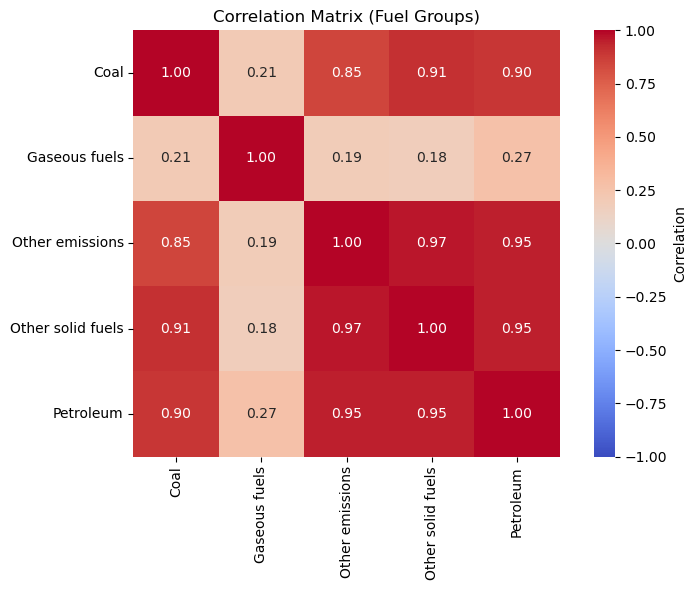

In [31]:
# --- Fuel group correlation heatmap ---
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    fuel_corr.astype(float),
    ax=ax,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Correlation"}
)
ax.set_title("Correlation Matrix (Fuel Groups)")
plt.tight_layout()
plt.show()

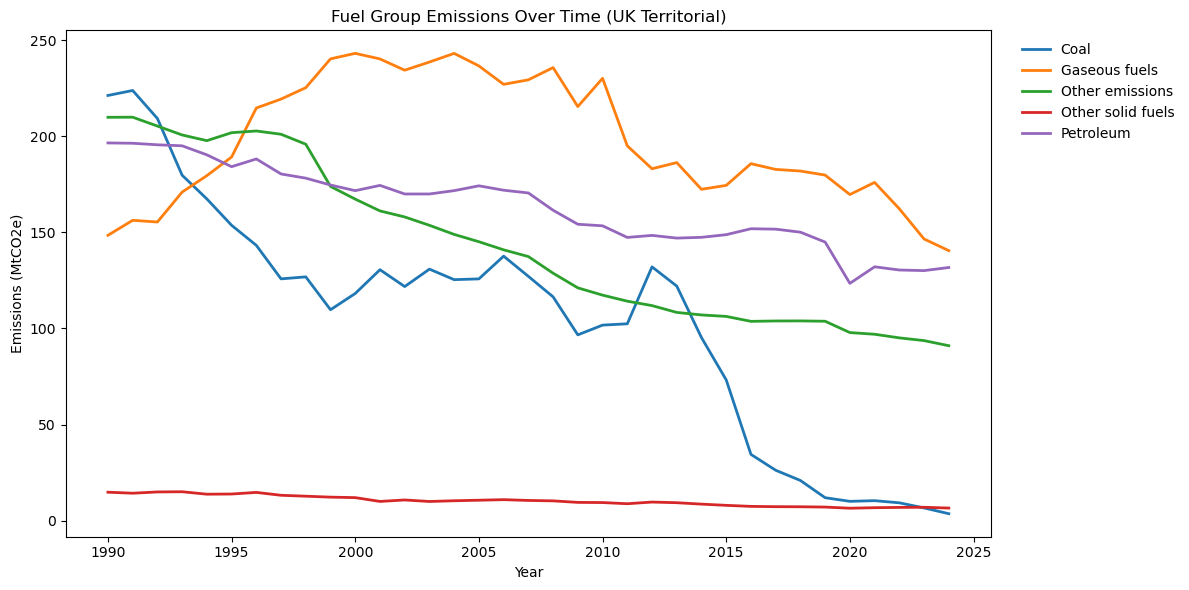

In [33]:
# --- Fuel group trajectories over time ---
fig, ax = plt.subplots(figsize=(12, 6))
for fuel in pivot_fuel.columns:
    ax.plot(pivot_fuel.index, pivot_fuel[fuel], linewidth=2, label=fuel)
ax.set_title("Fuel Group Emissions Over Time (UK Territorial)")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

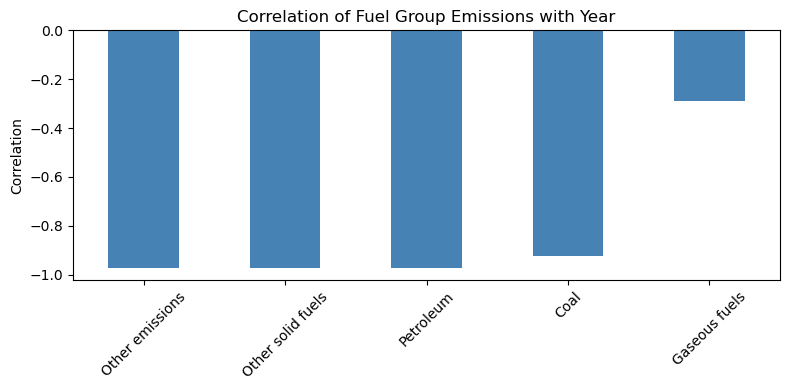

In [34]:
# --- Fuel group correlation with Year ---
fuel_corr_year = pd.Series({
    f: correlation(years, pivot_fuel[f].values) for f in fuels
}).sort_values()

fig, ax = plt.subplots(figsize=(8, 4))
fuel_corr_year.plot(kind="bar", ax=ax, color="steelblue")
ax.set_title("Correlation of Fuel Group Emissions with Year")
ax.set_ylabel("Correlation")
ax.axhline(y=0, color="black", linewidth=0.5)
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

### Interpretation of Observed Emission Patterns

The dataset contains 78,022 granular emission records spanning 1990 to 2024, with no missing values. After filtering to UK territorial emissions and aggregating by sector, we obtain 8 sector-level time series across 35 years. A parallel analysis at the fuel group level (5 groups) provides a complementary view of the energy mix driving these trends.

**Sector-level covariance and correlation.** All sector pairs exhibit positive covariance and correlation in levels, reflecting a shared downward trend in UK emissions since 1990. The covariance matrix is dominated by Electricity supply (variance 2564) and Industry (1231) simply because these are the largest emitters in absolute terms, illustrating that covariance is scale-dependent and not directly comparable across sectors of different sizes. The correlation matrix normalises for scale and reveals more structure: Fuel supply, Industry, LULUCF, and Waste form a tightly correlated group (all pairwise r > 0.85), meaning they have declined at a similar pace. Domestic transport is the clear outlier, with the weakest correlations to every other sector (r = 0.31 to 0.69), indicating a distinct and much slower trajectory of decline.

**Year-over-year differenced correlation.** Once the shared long-run trend is removed by differencing, nearly all pairwise correlations drop close to zero. This means sectors fluctuate independently in the short term, and the high level correlations are largely an artifact of a common downward trend rather than evidence of shared year-to-year drivers. The strongest remaining link is between Buildings and Electricity supply (r = 0.39), likely reflecting shared sensitivity to winter temperatures.

**Visualised patterns.** The trajectory plot confirms Electricity supply has undergone the largest absolute reduction (from ~204 MtCO2e in 1990 to well below 100), driven by the shift from coal to renewables. Domestic transport remained roughly flat until the mid-2010s before a modest decline, explaining its weak correlation with Year (r = -0.55 vs -0.99 for Fuel supply). The boxplot of year-over-year changes shows Electricity supply and Buildings are the most volatile sectors, while Agriculture and LULUCF are the most stable with tight interquartile ranges. The histograms reinforce this: Electricity supply's YoY changes span roughly -30 to +15 MtCO2e, while Agriculture stays within -3 to +2 MtCO2e.

**Fuel group analysis.** Coal, Petroleum, Other emissions, and Other solid fuels are all strongly correlated (r > 0.85), reflecting a broad structural shift away from fossil fuels. Gaseous fuels is the exception, with correlations below 0.3 to all other groups. Natural gas usage rose through the 1990s and 2000s (partly replacing coal in electricity generation) before declining more recently, giving it a correlation with Year of only -0.29 compared to -0.97 for Other emissions and -0.93 for Coal. This divergence highlights that the UK's emission reductions have not been uniform across fuel types: the coal-to-gas transition initially lowered emissions per unit of energy but created a new source that has been slower to decline.

# Question 2
## Cluster Analysis
Cluster analysis is used to group data points based on similarity in their attributes.
1. Choose one clustering algorithm discussed in the lectures and apply it to group emission sources
or activities based on their emission trajectories over time.
2. Clearly justify the variables used for clustering (e.g., emission levels, rate of change, fuel group).
Interpret the resulting clusters and explain what they reveal about structural changes in UK
greenhouse gas emissions.
3. Relate your clustering results to UK climate policy by identifying which clusters align with
sectorstargeted under UK Carbon Budgets and which sectors appear more resistant to emission
reductions.

In [47]:
# --- Q2: Cluster emission subsectors by trajectory ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [48]:
# --- Subsector time series ---
SUB_COL = "Territorial Emissions Statistics subsector"

sub_year = (
    territorial
    .groupby(["Year", SUB_COL], as_index=False)["Emissions (MtCO2e)"]
    .sum()
)

pivot_sub = (
    sub_year
    .pivot(index="Year", columns=SUB_COL, values="Emissions (MtCO2e)")
    .fillna(0.0)
    .sort_index()
)

# Transpose so rows = subsectors, columns = years
X = pivot_sub.T
print("Shape:", X.shape)
X.head()

Shape: (27, 35)


Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Territorial Emissions Statistics subsector,,,,,,,,,,,,,,,,,,,,,
Agricultural combustion,4.325499,4.499649,4.668857,4.424387,4.450208,4.574767,4.979039,4.690097,4.555080,5.043046,...,6.575694,6.380964,6.332409,4.798576,5.104755,5.224523,5.140008,4.144526,5.201700,5.855751
Agricultural soils,14.526131,14.623143,13.924617,13.348997,13.923282,13.984590,14.239490,14.318589,14.054559,14.080221,...,12.808333,12.496116,12.650881,12.523147,12.763325,11.896074,12.302954,11.593226,11.693428,11.093132
Bioenergy crops,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006565,-0.012377,-0.015531,-0.003829,-0.021312,-0.008765,-0.016776,-0.010148,-0.028153,0.001828
Civil aviation,1.494801,1.509820,1.509616,1.480041,1.378973,1.462233,1.616538,1.641061,1.732712,1.938997,...,1.529931,1.467114,1.563166,1.426500,1.341422,0.571256,0.762536,1.071080,1.132249,1.182713
Commercial buildings,12.473368,14.381214,13.103239,14.030387,13.713749,14.216497,15.177762,13.423471,14.580264,15.925649,...,12.784026,12.458749,11.937840,14.073720,13.346142,13.134891,14.118867,13.208619,12.693438,13.354014


In [49]:
# --- Scale trajectories ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

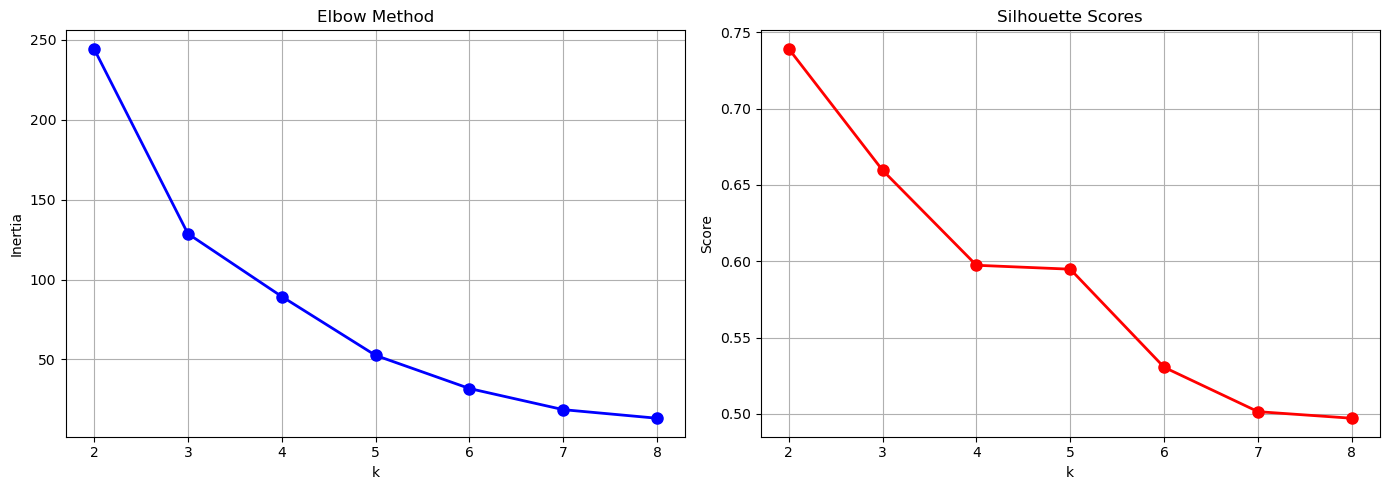

In [50]:
# --- Elbow and silhouette ---
inertias = []
silhouettes = []
k_range = range(2, 9)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(list(k_range), inertias, "bo-", linewidth=2, markersize=8)
axes[0].set_title("Elbow Method")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

axes[1].plot(list(k_range), silhouettes, "ro-", linewidth=2, markersize=8)
axes[1].set_title("Silhouette Scores")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Score")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [51]:
# --- Run K-Means (adjust k after seeing plots) ---
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# Assign clusters
cluster_map = pd.Series(labels, index=X.index, name="cluster")

for c in range(k):
    members = cluster_map[cluster_map == c].index.tolist()
    print(f"\nCluster {c} ({len(members)} subsectors):")
    for m in members:
        print(f"  - {m}")


Cluster 0 (20 subsectors):
  - Agricultural combustion
  - Agricultural soils
  - Bioenergy crops
  - Civil aviation
  - Commercial buildings
  - Cropland mineral soils change
  - Forestry
  - Grassland mineral soils change
  - Industrial processes
  - Other LULUCF
  - Other agriculture
  - Other buildings and product uses
  - Other domestic transport
  - Other industry
  - Peatland
  - Public sector buildings
  - Railways
  - Settlement
  - Solid fuel supply
  - Waterborne

Cluster 1 (2 subsectors):
  - Power stations
  - Road

Cluster 2 (5 subsectors):
  - Industrial fuel combustion
  - Livestock
  - Oil and gas supply
  - Residential buildings
  - Waste


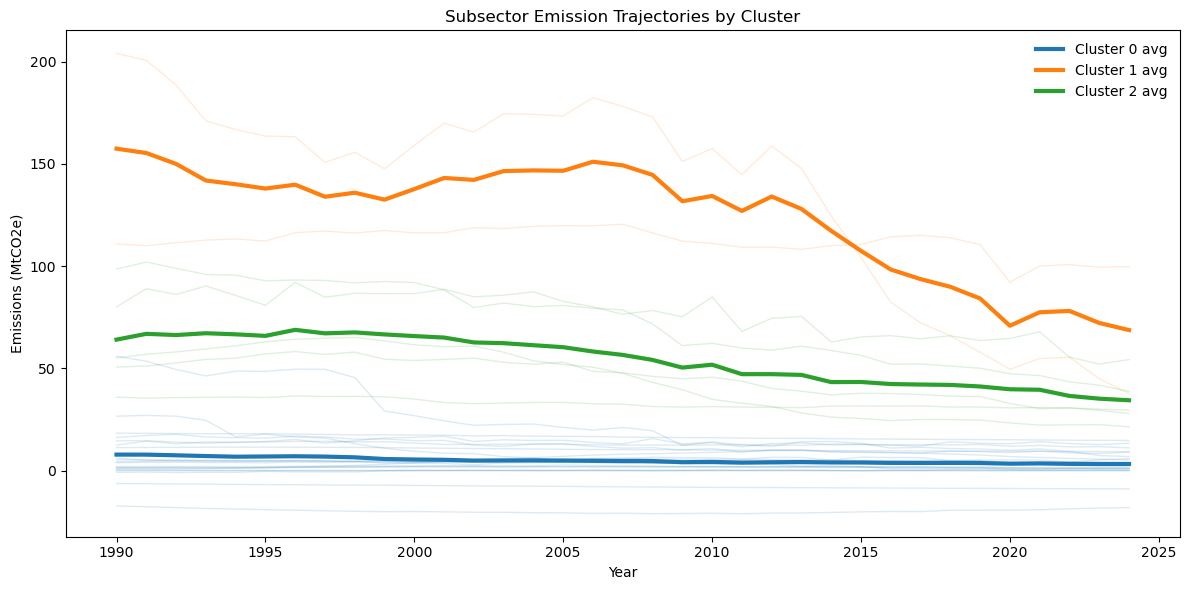

In [54]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

fig, ax = plt.subplots(figsize=(12, 6))
for c in range(k):
    members = cluster_map[cluster_map == c].index.tolist()
    for m in members:
        ax.plot(pivot_sub.index, pivot_sub[m], color=colors[c], alpha=0.15, linewidth=1)
    ax.plot(pivot_sub.index, pivot_sub[members].mean(axis=1),
            color=colors[c], linewidth=3, label=f"Cluster {c} avg")

ax.set_title("Subsector Emission Trajectories by Cluster")
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (MtCO2e)")
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

In [53]:
# --- Cluster summary ---
summary = pd.DataFrame(index=range(k))
for c in range(k):
    members = cluster_map[cluster_map == c].index.tolist()
    summary.loc[c, "n_subsectors"] = len(members)
    summary.loc[c, "avg_1990"] = pivot_sub[members].iloc[0].mean()
    summary.loc[c, "avg_latest"] = pivot_sub[members].iloc[-1].mean()
    summary.loc[c, "avg_pct_change"] = (
        (pivot_sub[members].iloc[-1].mean() - pivot_sub[members].iloc[0].mean())
        / abs(pivot_sub[members].iloc[0].mean()) * 100
    )

display(summary.round(2))

,n_subsectors,avg_1990,avg_latest,avg_pct_change
0,20.0,7.80,3.21,-58.85
1,2.0,157.39,68.69,-56.36
2,5.0,64.02,34.37,-46.31


### Q2: Cluster Analysis - Interpretation

**Variable justification (Q2.2).** We cluster the 27 subsectors directly on their 35-year emission trajectories (1990-2024), scaled with StandardScaler. This captures the full shape of each time series rather than relying on summary statistics. Scaling is necessary because subsector emissions range from near-zero (Bioenergy crops) to over 180 MtCO2e (Power stations), and without it K-Means would simply separate large from small emitters. We select k=3 based on the elbow at k=3 in the inertia plot and a strong silhouette score of 0.66.

**Cluster interpretation.** Cluster 1 (Power stations, Road transport) contains the two dominant emitters, averaging 157 MtCO2e in 1990 with a 56% reduction by 2024. Cluster 2 (Industrial fuel combustion, Livestock, Oil and gas supply, Residential buildings, Waste) captures mid-sized emitters averaging 64 MtCO2e in 1990, with the slowest decline at 46%. Cluster 0 groups the remaining 20 small subsectors (avg 7.8 MtCO2e in 1990), collectively down 59%.

**Policy relevance (Q2.3).** Cluster 1 aligns with the sectors most directly targeted by UK Carbon Budgets: coal phase-out drove the steep Power stations decline, while Road transport is a key focus of the sixth Carbon Budget through EV adoption. Cluster 2 represents the "harder to abate" sectors. Livestock and Industrial combustion require process-level changes rather than fuel switching, and Residential buildings depend on the slow rollout of heat pumps. Their 46% decline, the weakest of all three clusters, flags these as the main risk to meeting future carbon budgets. Cluster 0's broad-based 59% reduction suggests structural decarbonisation is occurring across the wider economy, even among individually minor sources.

# Question 3
## Policy Interpretation and Critical Analysis
1. Using the column Included in UK territorial total, compare emission trends with and
without international aviation and shipping. Discuss how this distinction affects progress as-
sessment against UK Carbon Budgets.
2. Using the Included in UK Paris Agreement total indicator,identify which emission sources
are covered under the UK’s Paris Agreement reporting. Explain the implications of this coverage
for interpreting national emission reduction performance.
3. Based on your data-driven findings, critically assess whether historical emission trends suggest
that the UK is structurally aligned with its long-term climate targets. Support your answer with
quantitative evidence from your analysis.